In [111]:
import pandas as pd


df = pd.read_csv("../Preprocessing/data.csv")
df

,Unnamed: 0,냉해노출수,총 강우량,1~2월 평균 누적 강수량,일조량,일사량,농가 수,재배면적,10a당 생산량,생산량,의성군재배면적,의성군생산량
0,2019,20,1855.0,88.50,621560,982,13198.0,27689.0,1400.0,387671.0,1700.0,19262.0
1,2020,11,2855.5,319.50,510738,801,10376.0,25372.0,1432.0,363432.0,1444.0,14937.0
2,2021,21,2067.5,78.50,481655,708,11495.0,21999.0,1402.0,312995.0,1340.0,13568.0
3,2022,26,1711.0,0.00,552621,810,11228.0,22362.0,1220.0,290824.0,1246.0,12084.0
4,2023,24,3101.0,71.75,547410,816,10691.0,24700.0,1288.0,312438.0,1215.0,11801.0
5,2024,16,1897.5,249.50,347284,466,NaN,23291.0,NaN,NaN,1027.7,NaN


In [112]:
# Unnamed: 0을 인덱스로 설정하고, 10a당 생산량, 생산량, 의성군재배면적 열을 삭제
df = df.drop(['Unnamed: 0', '10a당 생산량', '생산량', '재배면적'], axis=1)
df

,냉해노출수,총 강우량,1~2월 평균 누적 강수량,일조량,일사량,농가 수,의성군재배면적,의성군생산량
0,20,1855.0,88.50,621560,982,13198.0,1700.0,19262.0
1,11,2855.5,319.50,510738,801,10376.0,1444.0,14937.0
2,21,2067.5,78.50,481655,708,11495.0,1340.0,13568.0
3,26,1711.0,0.00,552621,810,11228.0,1246.0,12084.0
4,24,3101.0,71.75,547410,816,10691.0,1215.0,11801.0
5,16,1897.5,249.50,347284,466,NaN,1027.7,NaN


In [113]:
# 5번째 인덱스의 농가수는 평균값으로 대체
df.loc[5, '농가 수'] = df['농가 수'].iloc[:5].mean()
df

,냉해노출수,총 강우량,1~2월 평균 누적 강수량,일조량,일사량,농가 수,의성군재배면적,의성군생산량
0,20,1855.0,88.50,621560,982,13198.0,1700.0,19262.0
1,11,2855.5,319.50,510738,801,10376.0,1444.0,14937.0
2,21,2067.5,78.50,481655,708,11495.0,1340.0,13568.0
3,26,1711.0,0.00,552621,810,11228.0,1246.0,12084.0
4,24,3101.0,71.75,547410,816,10691.0,1215.0,11801.0
5,16,1897.5,249.50,347284,466,11397.6,1027.7,NaN


In [114]:
# Scikit-learn의 GridSearch를 사용하여 회귀와 관련된 모델 탐색
from sklearn.linear_model import LinearRegression

feature = df[df.columns[:-1]].iloc[:-1]
target = df[df.columns[-1]].iloc[:-1]
model = LinearRegression()


In [116]:
df[df.columns[:-1]].iloc[-1:]

,냉해노출수,총 강우량,1~2월 평균 누적 강수량,일조량,일사량,농가 수,의성군재배면적
5,16,1897.5,249.5,347284,466,11397.6,1027.7


In [117]:
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, Lars, LassoLars, 
    OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, SGDRegressor, 
    PassiveAggressiveRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, 
    BaggingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
)
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.dummy import DummyRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Least Angle Regression (LARS)": Lars(),
    "Lasso Least Angle Regression": LassoLars(),
    "Orthogonal Matching Pursuit": OrthogonalMatchingPursuit(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "ARD Regression": ARDRegression(),
    "SGD Regressor": SGDRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Voting Regressor": VotingRegressor(estimators=[
        ('lr', LinearRegression()), ('rf', RandomForestRegressor())
    ]),
    "Stacking Regressor": StackingRegressor(estimators=[
        ('lr', LinearRegression()), ('rf', RandomForestRegressor())
    ], final_estimator=RandomForestRegressor()),
    "SVR": SVR(),
    "Linear SVR": LinearSVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(),
    "Isotonic Regression": IsotonicRegression(),
    "Gaussian Process Regressor": GaussianProcessRegressor(),
    "PLS Regression": PLSRegression(),
    "Dummy Regressor": DummyRegressor(strategy="mean")
}

for model_name, model in models.items():
    print(f"{model_name}: {model}")


Linear Regression: LinearRegression()
Ridge Regression: Ridge()
Lasso Regression: Lasso()
Elastic Net Regression: ElasticNet()
Least Angle Regression (LARS): Lars()
Lasso Least Angle Regression: LassoLars()
Orthogonal Matching Pursuit: OrthogonalMatchingPursuit()
Bayesian Ridge Regression: BayesianRidge()
ARD Regression: ARDRegression()
SGD Regressor: SGDRegressor()
Passive Aggressive Regressor: PassiveAggressiveRegressor()
Decision Tree: DecisionTreeRegressor()
Random Forest: RandomForestRegressor()
Gradient Boosting: GradientBoostingRegressor()
AdaBoost Regressor: AdaBoostRegressor()
Bagging Regressor: BaggingRegressor()
Extra Trees Regressor: ExtraTreesRegressor()
Voting Regressor: VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor())])
Stacking Regressor: StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=RandomForest

Linear Regression Coefficients: [-3.53502158e-01  1.06697161e-01  6.85178503e+00  6.97335361e-04
  1.56247339e+00  1.25092212e+00  8.31056391e+00]


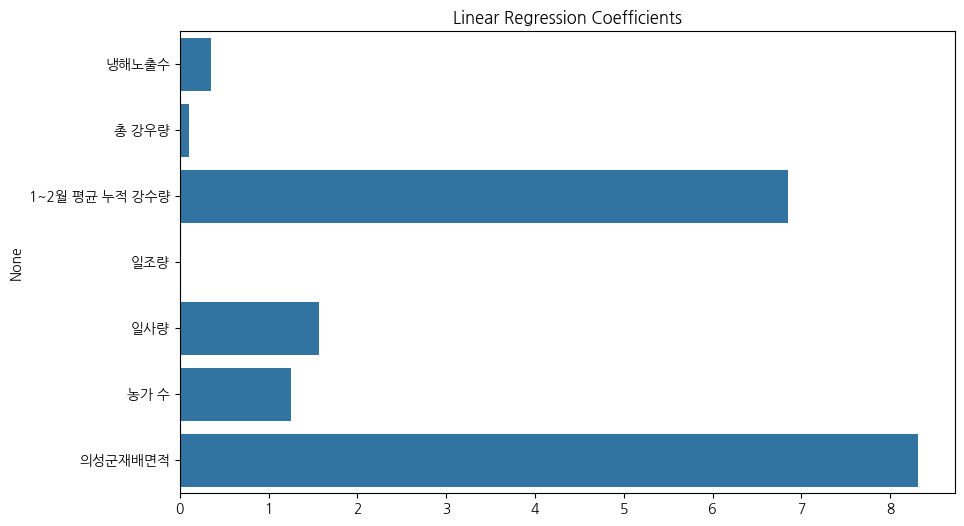

Ridge Regression Coefficients: [-3.53498454e-01  1.06715485e-01  6.85171282e+00  6.97313114e-04
  1.56245747e+00  1.25093867e+00  8.31048076e+00]


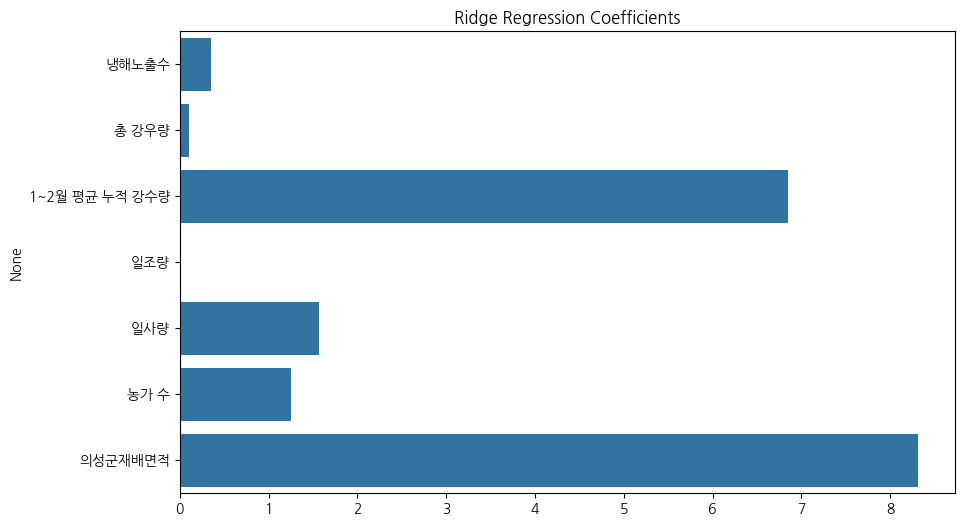

Lasso Regression Coefficients: [-3.75477571e+02  2.50549141e-01 -4.94933620e+00  4.31654123e-03
  4.18465667e+00  1.83915016e+00  1.50550855e+00]


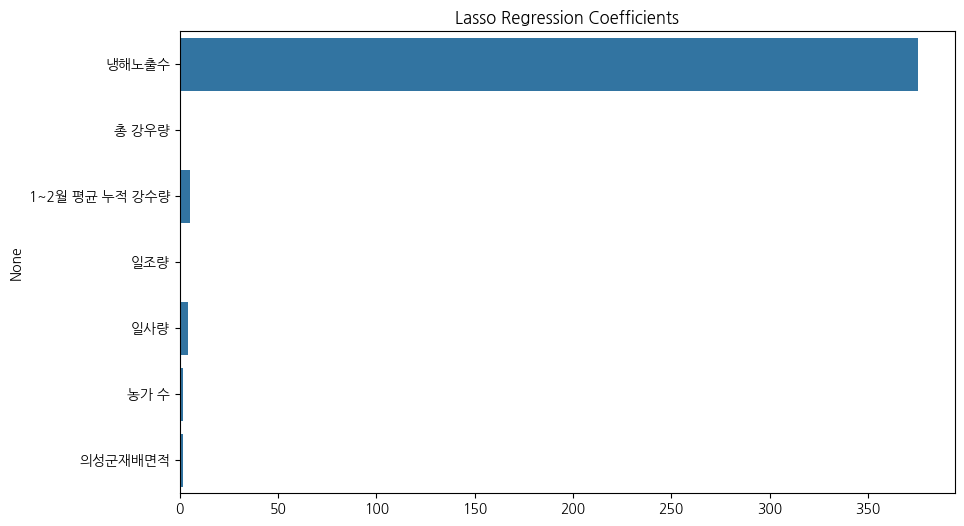

Elastic Net Regression Coefficients: [-0.00000000e+00 -2.74434932e-02  1.37214074e+01 -8.22434137e-04
  4.17882857e+00  2.22676518e+00  2.02412926e+00]


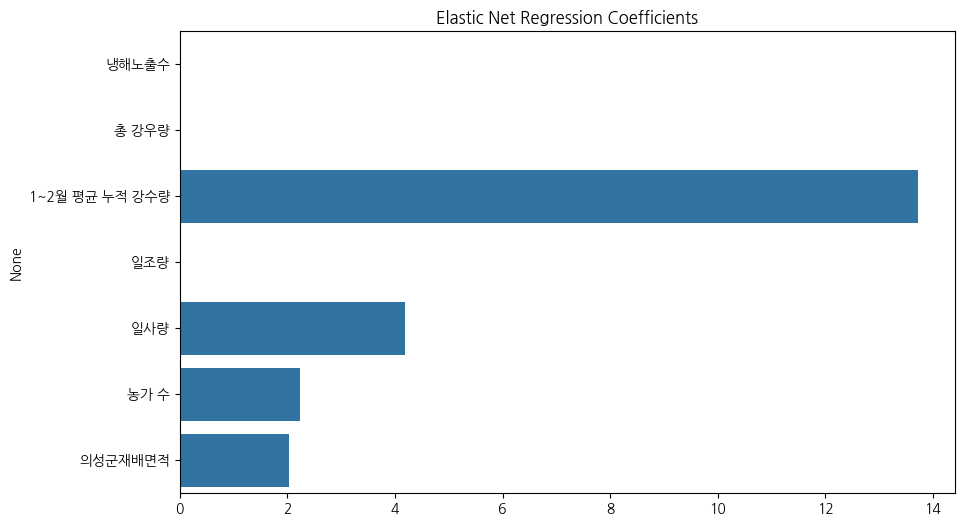

                    Model           MSE        R2
0       Linear Regression  3.970467e-23  1.000000
1        Ridge Regression  2.378647e-04  1.000000
2        Lasso Regression  4.506173e+00  0.999999
3  Elastic Net Regression  1.310295e-02  1.000000
4           Decision Tree  0.000000e+00  1.000000
5           Random Forest  1.264273e+06  0.827822
6       Gradient Boosting  5.180414e-03  1.000000
7                     SVR  7.924007e+06 -0.079151


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# 회귀 모델 정의
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}
results = []

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(feature, target)
    y_pred = model.predict(feature)
    y_test = target
    
    # 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 결과 저장
    results.append({
        "Model": model_name,
        "MSE": mse,
        "R2": r2
    })
    
    # 회귀 계수가 있는 모델에 대해서만 출력 및 시각화
    if hasattr(model, 'coef_'):
        print(f"{model_name} Coefficients: {model.coef_}")
        
        # 회귀 계수 시각화
        plt.figure(figsize=(10, 6))
        sns.barplot(x=np.abs(model.coef_), y=df.columns[:-1])
        plt.title(f"{model_name} Coefficients")
        plt.show()

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results)

# 평가 지표 출력
print(results_df)


In [119]:
results_df

,Model,MSE,R2
0,Linear Regression,3.970467e-23,1.000000
1,Ridge Regression,2.378647e-04,1.000000
2,Lasso Regression,4.506173e+00,0.999999
3,Elastic Net Regression,1.310295e-02,1.000000
4,Decision Tree,0.000000e+00,1.000000
5,Random Forest,1.264273e+06,0.827822
6,Gradient Boosting,5.180414e-03,1.000000
7,SVR,7.924007e+06,-0.079151


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

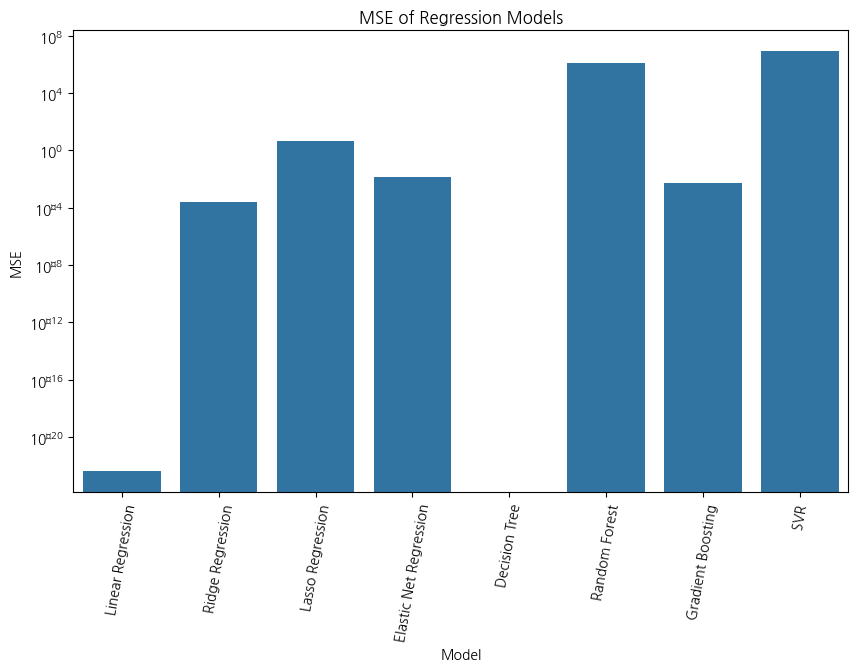

In [120]:
# MSE 시각화 + 로그 스케일로 변환
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MSE')
plt.yscale('log')
plt.title("MSE of Regression Models")
# xlabel 80도로 돌리기
plt.xticks(rotation=80)
plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

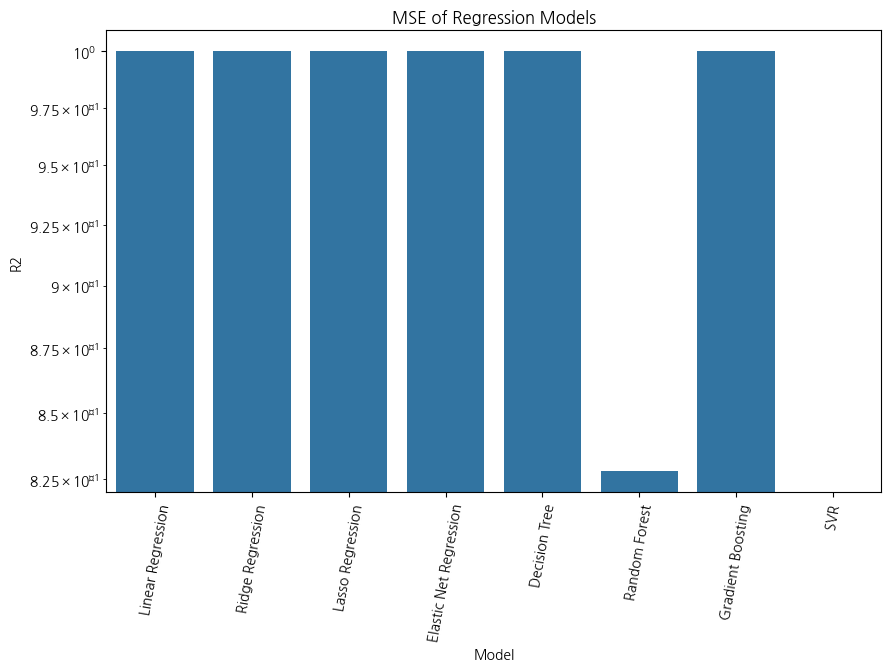

In [121]:
# MSE 시각화 + 로그 스케일로 변환
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='R2')
plt.yscale('log')
plt.title("MSE of Regression Models")
# xlabel 80도로 돌리기
plt.xticks(rotation=80)
plt.show()

In [122]:
model = DecisionTreeRegressor()
model.fit(feature, target)
model.predict(df[df.columns[:-1]].iloc[-1:])

array([13568.])